# MODEL GENERATION OF GBM RANDOM PATHS

In this notebook I show how you can generate random paths according to a GBM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.models.FinGBMProcess import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:29 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



In [3]:
process = FinGBMProcess()

## Single Asset

We can generate time series for a single asset over time.

In [17]:
numPaths = 10000
numTimeSteps = 2
t = 1.0
mu = 0.03
S=100.0
vol = 0.2
seed = 1912

In [18]:
x = getPaths(numPaths,numTimeSteps,t,mu,S,vol,seed)

This can be plotted

In [19]:
x.shape

(20000, 3)

The distribution at time zero is peaked at 100.0

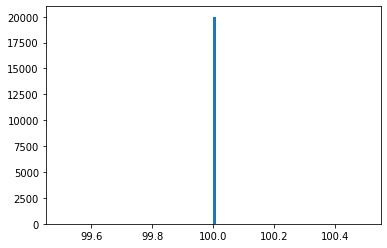

In [20]:
plt.hist(x[:,0], 100);

After a year there is a full lognormal distribution

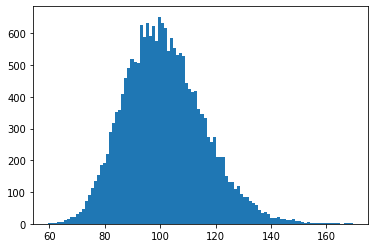

In [21]:
plt.hist(x[:,1], 100);

## Multiple Assets One Time

In [76]:
numAssets = 2
numPaths = 10000
numTimeSteps = 2
t = 1.0
mus = 0.03 * np.ones(numAssets)
stockPrices = 100.0 * np.ones(numAssets)
volatilities = 0.2 * np.ones(numAssets)
rho = 0.9999
corrMatrix = np.array([[1.0, rho],[rho, 1.0]])
seed = 1912

In [77]:
x = getAssets(numAssets, numPaths, t,
                   mus, stockPrices, volatilities,
                   corrMatrix, seed)

In [78]:
x.shape

(20000, 2)

In [79]:
x

array([[177.55530639, 178.00024012],
       [ 98.01446156,  98.5703073 ],
       [122.594059  , 122.28616957],
       ...,
       [ 81.19405101,  81.2466739 ],
       [129.68390628, 129.74501396],
       [ 83.74783896,  83.33294683]])

## Multiple Assets and Times

In [58]:
numAssets = 2
numPaths = 10000
numTimeSteps = 2
t = 1.0
mus = 0.03 * np.ones(numAssets)
stockPrices = 100.0 * np.ones(numAssets)
volatilities = 0.2 * np.ones(numAssets)
rho = 0.3
corrMatrix = np.array([[1.0, rho],[rho, 1.0]])
seed = 1912

In [59]:
mus, stockPrices, volatilities

(array([0.03, 0.03]), array([100., 100.]), array([0.2, 0.2]))

In [60]:
corrMatrix

array([[1. , 0.3],
       [0.3, 1. ]])

In [61]:
x = getPathsAssets(numAssets, numPaths, numTimeSteps, t,
                   mus, stockPrices, volatilities,
                   corrMatrix, seed)

In [62]:
x.shape

(20000, 3, 2)

In [63]:
x

array([[[100.        , 100.        ],
        [ 98.38791532, 130.76293912],
        [113.39649611, 121.56624422]],

       [[100.        , 100.        ],
        [122.73085817, 103.85874482],
        [ 94.80993213,  91.09672743]],

       [[100.        , 100.        ],
        [ 92.99294116, 104.15982172],
        [101.33438841, 103.86885503]],

       ...,

       [[100.        , 100.        ],
        [ 84.43564014, 112.01112396],
        [ 80.53857693, 135.91115838]],

       [[100.        , 100.        ],
        [110.01676438, 115.42047693],
        [115.22905479,  99.58218223]],

       [[100.        , 100.        ],
        [116.01756008,  95.42216717],
        [114.06612186, 122.72885293]]])

Copyright (c) 2019, Dominic O'Kane 